## Classification with KNN (K Nearest Neighbours)

In [2]:
# Sample data

import pandas as pd

sensus = {
    'tinggi': [158, 170, 183, 191, 155, 163, 180, 158, 176],
    'berat': [64, 86, 84, 80, 49, 59, 67, 54, 67],
    'jenis_kelamin': ['pria','pria','pria','pria','wanita','wanita','wanita','wanita','wanita']
}

sensus_df = pd.DataFrame(sensus)
sensus_df

,tinggi,berat,jenis_kelamin
0,158,64,pria
1,170,86,pria
2,183,84,pria
3,191,80,pria
4,155,49,wanita
5,163,59,wanita
6,180,67,wanita
7,158,54,wanita
8,176,67,wanita


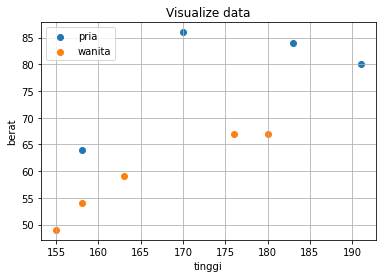

In [13]:
# Data visualization

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for j, d in sensus_df.groupby('jenis_kelamin'):
    ax.scatter(d['tinggi'], d['berat'], label = j)
    
# plt.scatter(sensus_df['tinggi'], sensus_df['berat'], colour = sensus_df['jenis_kelamin'])
plt.title('Visualize data')
plt.legend(loc = 'upper left')
plt.xlabel('tinggi')
plt.ylabel('berat')
plt.grid(True)
plt.show()


In [17]:
# Prepocessing dataset

import numpy as np

X_train = np.array(sensus_df[['tinggi','berat']])
y_train = np.array(sensus_df['jenis_kelamin'])

print(f'X_train:{X_train}')
print(f'y_train: {y_train}')

X_train:[[158  64]
 [170  86]
 [183  84]
 [191  80]
 [155  49]
 [163  59]
 [180  67]
 [158  54]
 [176  67]]
y_train: ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita' 'wanita']


In [51]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb.fit(y_train)
y_train = lb.transform(y_train)

print(f'y_train: {y_train}')

y_train: [[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [24]:
y_train = y_train.flatten()
# y_train
print(f'y_train: {y_train}')

y_train: [0 0 0 0 1 1 1 1 1]


In [30]:
# Training model with KNN

from sklearn.neighbors import KNeighborsClassifier

K = 3 #nearest neigbours for make a prediction

model = KNeighborsClassifier(n_neighbors = K)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
# Predicit
tinggi_b = 155
berat_b = 70

X_new = np.array([tinggi_b,berat_b]).reshape(1,-1)
# X_new = np.array([[tinggi_b,berat_b]])
X_new

array([[155,  70]])

In [38]:
y_new = model.predict(X_new)
y_new

array([1])

In [40]:
lb.inverse_transform(y_new)

array(['wanita'], dtype='<U6')

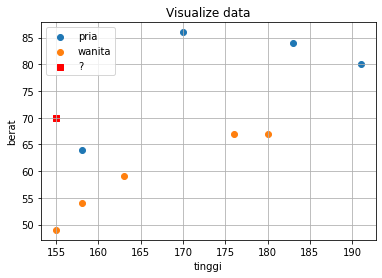

In [43]:
# Visualization Nearest Neighbours

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for j, d in sensus_df.groupby('jenis_kelamin'):
    ax.scatter(d['tinggi'], d['berat'], label = j)
    
plt.scatter(tinggi_b, berat_b, marker = 's', color = 'red', label = '?')
plt.title('Visualize data')
plt.legend(loc = 'upper left')
plt.xlabel('tinggi')
plt.ylabel('berat')
plt.grid(True)
plt.show()

In [44]:
# Calculation distance

m = np.array([tinggi_b,berat_b])
m

array([155,  70])

In [45]:
X_train

array([[158,  64],
       [170,  86],
       [183,  84],
       [191,  80],
       [155,  49],
       [163,  59],
       [180,  67],
       [158,  54],
       [176,  67]], dtype=int64)

In [48]:
from scipy.spatial.distance import euclidean

jarak = [euclidean(m, d) for d in X_train]
jarak

[6.708203932499369,
 21.93171219946131,
 31.304951684997057,
 37.36308338453881,
 21.0,
 13.601470508735444,
 25.179356624028344,
 16.278820596099706,
 21.213203435596427]

In [49]:
sensus_df['jarak'] = jarak
sensus_df.sort_values(['jarak'])

,tinggi,berat,jenis_kelamin,jarak
0,158,64,pria,6.708204
5,163,59,wanita,13.601471
7,158,54,wanita,16.278821
4,155,49,wanita,21.000000
8,176,67,wanita,21.213203
1,170,86,pria,21.931712
6,180,67,wanita,25.179357
2,183,84,pria,31.304952
3,191,80,pria,37.363083


In [74]:
# Evaliation model

X_test = np.array([[168, 65],[180, 96],[160, 52],[155, 60]])
y_test = np.array(['pria','pria','wanita','wanita'])

In [75]:
print(f'X_test: {X_test}')
print(f'y_test: {y_test}')

X_test: [[168  65]
 [180  96]
 [160  52]
 [155  60]]
y_test: ['pria' 'pria' 'wanita' 'wanita']


In [76]:
y_test = lb.fit_transform(y_test).flatten()
print(f'y_test: {y_test}')

y_test: [0 0 1 1]


In [77]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 1])

In [78]:
lb.inverse_transform(y_pred)

array(['wanita', 'pria', 'wanita', 'wanita'], dtype='<U6')

In [80]:
# Evaluate with accuracy score

from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print(f'acc: {acc}')

acc: 0.75


In [81]:
# Evaluate with precission

from sklearn.metrics import precision_score

pre = precision_score(y_test, y_pred)
print(f'pre: {pre}')

pre: 0.6666666666666666


In [82]:
# Evaluate with recall

from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print(f'recall: {recall}')

recall: 1.0


In [83]:
# Evaluate with F1 score

from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print(f'f1: {f1}')

f1: 0.8


In [85]:
# CLASSIFICATION REPORT

from sklearn.metrics import classification_report

clc_report = classification_report(y_test, y_pred)
print(f'clc_report:\n{clc_report}')

clc_report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [88]:
# Evaluate with matthew correlation coefficient 
# In this method, 1 is a perfect classifier, 0 means classifier will predict randomly, -1 means perfectlly wrong clasifier
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)
print(f'mcc: {mcc}')

mcc: 0.5773502691896258
